Rolling three independent dice

The probem is the following:
Imagine that we are rolling three 6-sided independent dice, 
how do we get the best estimate for the sum of the numbers?
The answer actually depends on what does that mean by "best".
Below we consider two scenarios:

(1) By best, we mean that the estimate minimizes the MSE (Mean Squared Error)

(2) By best, we mean the estimate corresponds to the MLE (Maximum Likehood Estimate)


For a single die, the average is $(1+2+\dots+6)/6 = 3.5$, therefore for 3 dice, the estimate is $3 * 3.5 = 10.5$. This corresponds to the minimizer of the MSE. 

However, this number $10.5$ never exists when we roll three dice!

So, to get the highest chance of $\textit{being exactly right}$, we can use the MLE maximizer. 

Demonstration below:

In [2]:
import itertools
import numpy as np


In [3]:
# First, enumerate all possible outcomes of rolling three dice and compute the sum
sum_table = {}
die = [1, 2, 3, 4, 5, 6]
n = 3
for p in itertools.product(die, repeat=n):
    sum_value = np.sum(p)
    if sum_value in sum_table:
        sum_table[sum_value] += 1
    else:
        sum_table[sum_value] = 1

In [4]:
sum_table

{3: 1,
 4: 3,
 5: 6,
 6: 10,
 7: 15,
 8: 21,
 9: 25,
 10: 27,
 11: 27,
 12: 25,
 13: 21,
 14: 15,
 15: 10,
 16: 6,
 17: 3,
 18: 1}

In [6]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [9]:
sums = list(sum_table.keys())
counts = list(sum_table.values())
freq = vals/np.sum(counts)

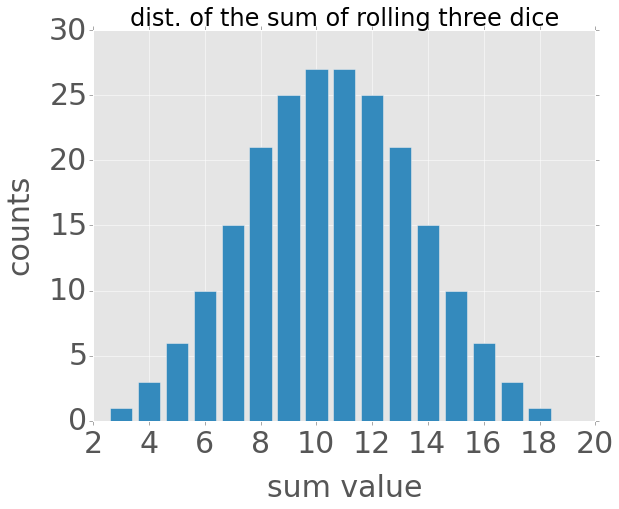

In [43]:
plt.close('all')
FONTSIZE = 30

fig, ax = plt.subplots(1, figsize=(9, 7))
p = ax.bar(sums, counts, width=0.8, align='center') #, fill=True, edgecolor='b', lw=2)

ax.set_xlabel('sum value', fontsize=FONTSIZE, labelpad=15)    
ax.set_ylabel('counts', fontsize=FONTSIZE, labelpad=15)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE) 
    tick.label.set_rotation(0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE) 
    tick.label.set_rotation(0)
t = ax.set_title('dist. of the sum of rolling three dice', fontsize=FONTSIZE*0.8)

From the above plot, it can be easily seen that to get the heighest chance of being exactly right, $10$ or $11$ is the MLE.

Now, we have two solutions, minimizer of MSE and MLE, the following demonstrates that the former indeed results in a loswer MSE than MLE does

In [33]:
def computeMSE(est, values):
    values = np.array(values)
    return np.mean(np.power(values-est, 2))

In [44]:
xbar = np.mean(sums)
idx_max_mle = np.argmax(counts)
mle = sums[idx_max_mle]

mse1 = computeMSE(xbar, vals)
mse2 = computeMSE(mle, vals)

print('xbar: {0:}, MSE: {1:}'.format(xbar, mse1))
print('MLE: {0:}, MSE: {1:}'.format(mle, mse2))

xbar: 10.5, MSE: 97.5
MLE: 10, MSE: 100.75
